In [4]:
import pandas as pd
import os
from PIL import Image
import matplotlib.pyplot as plt
from matplotlib.image import imread
import numpy as np
from sklearn.cluster import KMeans
import colorsys
import hdbscan
from sklearn.cluster import AgglomerativeClustering


In [5]:
# Set working directory
wkdir = os.getcwd()

In [50]:
# Import picture
picture_name = "nature.jpeg"
picture = wkdir + "/pictures/" + picture_name
image = Image.open(picture).convert("RGB")

In [51]:
# RGB pixels to DF
pix = image.load()
pix_vals = list(image.getdata())
pix_df = pd.DataFrame(pix_vals, columns =['R', 'G', 'B'])

In [52]:
# Run K-Means to cluster RBG values
k = 8
kmeans = KMeans(n_clusters = k)
ypred = kmeans.fit_predict(pix_df)

In [53]:
# Round cluster centers 
palette = []
for cluster_center in kmeans.cluster_centers_:
    palette.append(tuple([int(val) for val in cluster_center]))

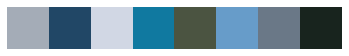

In [54]:
# Display palette
palette = np.array(palette)[np.newaxis, :, :]
plt.imshow(palette)
plt.axis('off')
plt.show()

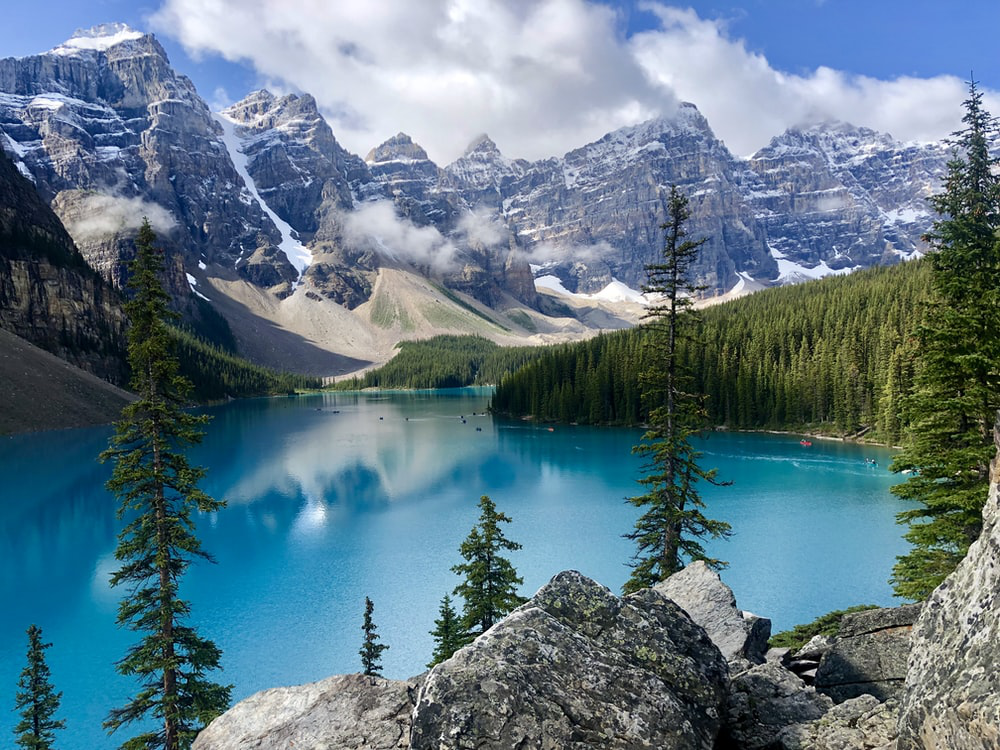

In [55]:
image

In [56]:
def rgb_and_hsv(rgb):
    '''
    Function to return RGB and HSV in same tuple, from RBG input
    '''
    r, g, b = rgb
    rbg_and_hsv = rgb + colorsys.rgb_to_hsv(r, g, b)
    return rbg_and_hsv

In [57]:
rgb_hsv = [rgb_and_hsv(rgb=pix) for pix in pix_vals]
rgb_hsv_df = pd.DataFrame(rgb_hsv, columns=['R', 'G', 'B', 'H', 'S', 'V'])
rgb_hsv_df['cluster'] = ypred

In [58]:
top_saturation_df = rgb_hsv_df.groupby("cluster").median('S')
top_saturation_df["RGB"] = list(zip(top_saturation_df.R, top_saturation_df.G, top_saturation_df.B))
hi_sat_palette = list(top_saturation_df["RGB"])
hi_sat_palette = tuple(tuple(map(int, tup)) for tup in hi_sat_palette)

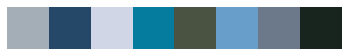

In [59]:
# Display palette
palette = np.array(hi_sat_palette)[np.newaxis, :, :]
plt.imshow(palette)
plt.axis('off')
plt.show()